In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('videogames-sales-dataset/PS4_GamesSales.csv', 
                     encoding='latin1')

In [17]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [18]:
# LIMPIEZA PS4

# Convierto Action a Action-Adventure en Género
df.Genre = df.Genre.replace('Action', 'Action-Adventure')
df.Publisher = df.Publisher.replace({
    'Sony Interactive Entertainment' :'Sony Interactive', 
    'Sony Computer Entertainment': 'Sony Computer',
    'Warner Bros. Interactive Entertainment': 'Warner Bros'})

# Imputo Unkwown a NA de Publisher y 0 a NA de Year y elimino 2019 y 2020
df.isnull().sum()
df.Publisher = df.Publisher.fillna('Unknown')
df.Year = df.Year.fillna(0)
df.Year = df.Year.astype('int')
df = df[~df['Year'].isin([2019, 2020])]

# Convertir todo a millones (está en decenas de millones)
a_mill = ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']
df[a_mill] = df[a_mill] * 10

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1014.0,1600.378698,815.854264,0.0,2014.0,2016.0,2017.0,2018.0
North America,1014.0,2.086489,5.682653,0.0,0.0,0.3,1.2,61.8
Europe,1014.0,2.536193,7.924223,0.0,0.0,0.0,1.3,97.1
Japan,1014.0,0.342998,1.093039,0.0,0.0,0.0,0.3,21.7
Rest of World,1014.0,0.907692,2.515433,0.0,0.0,0.1,0.5,30.2
Global,1014.0,5.874162,15.969992,0.0,0.0,0.7,3.7,193.9


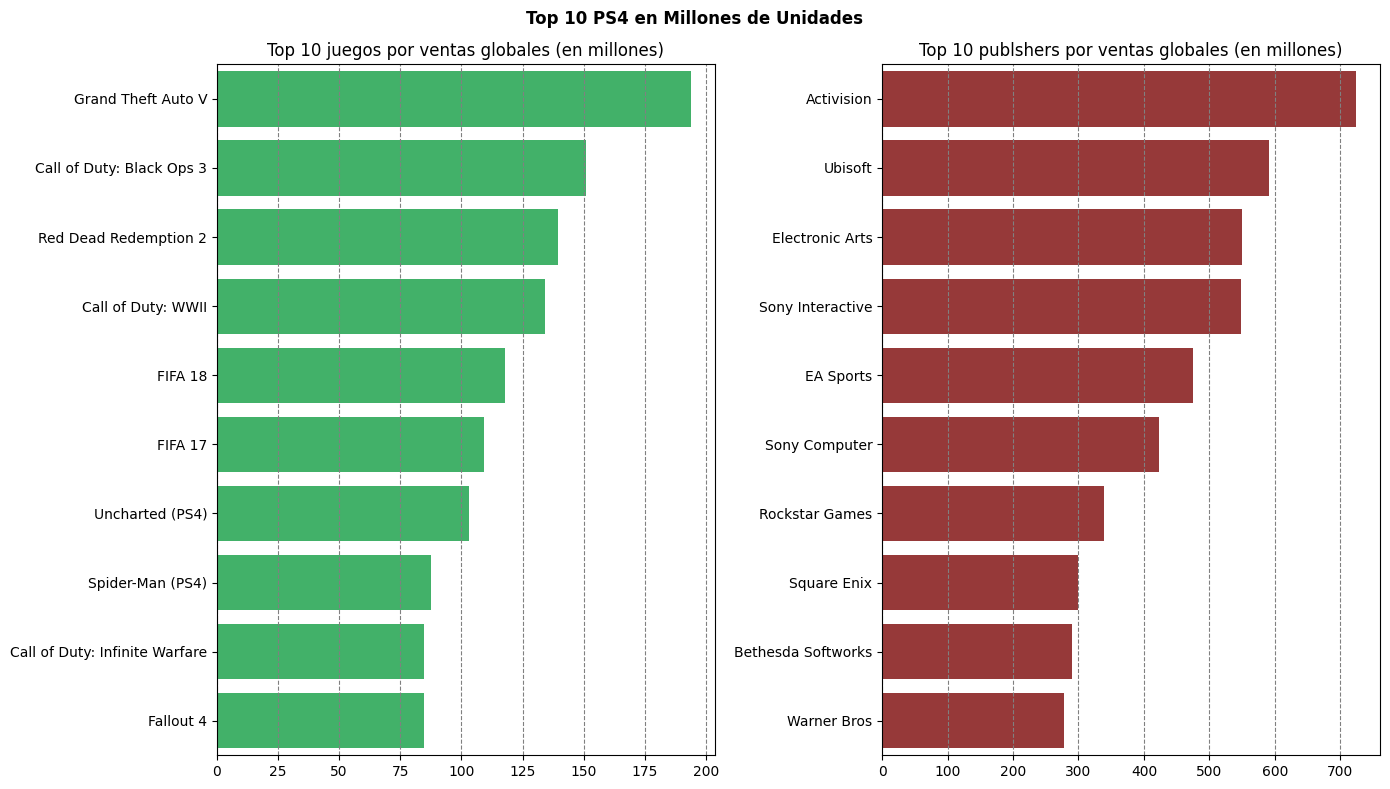

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
fig.suptitle('Top 10 PS4 en Millones de Unidades', fontweight='bold')

# Creo el top10 juego más vendidos
top_10_m = df.sort_values(by='Global', ascending=False)['Game'][:10]

ax[0] = sns.barplot(data=df, x='Global', y=top_10_m, errorbar=None, 
                    color="#2FC463FF", ax=ax[0])
ax[0].set_title('Top 10 juegos por ventas globales (en millones)')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].grid(True, which='major', axis='x', linestyle='--', color='gray')

# Creo el top10 publishers con más ventas
top_10_publishers = df.groupby('Publisher')['Global'].sum().\
    sort_values(ascending=False)[:10].reset_index()

ax[1] = sns.barplot(data=top_10_publishers, x='Global', y='Publisher', 
                    errorbar=None, color='brown', ax=ax[1])
ax[1].set_title('Top 10 publshers por ventas globales (en millones)')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].grid(True, which='major', axis='x', linestyle='--', color='gray')
plt.tight_layout()
plt.show()

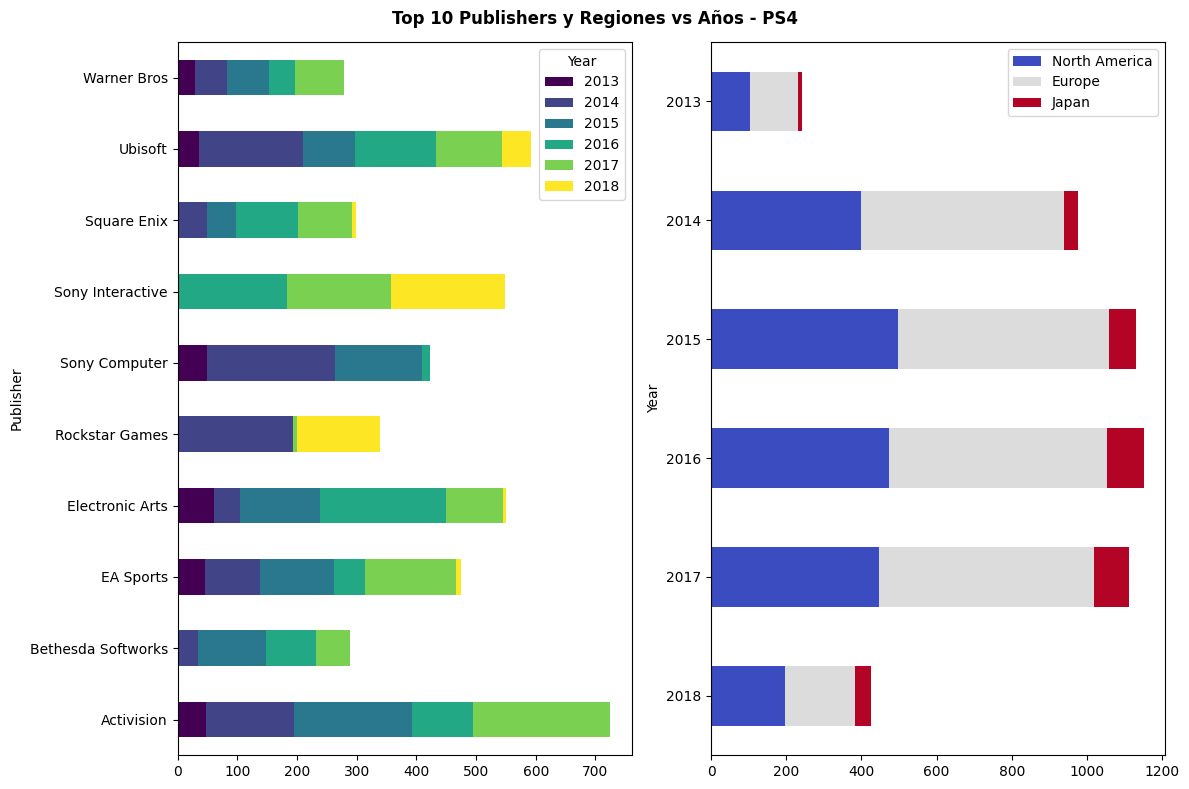

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

fig.suptitle('Top 10 Publishers y Regiones vs Años - PS4', fontweight='bold')

# DF's para los gráficos
top_10_publishers = df.groupby('Publisher')['Global'].sum()\
    .sort_values(ascending=False)[:10].index
top_10_publishers_an = df.groupby(['Year', 'Publisher'])['Global'].sum()\
    .sort_values(ascending=False).reset_index()
top_10_publishers_an = top_10_publishers_an[top_10_publishers_an['Publisher'] \
    .isin(top_10_publishers)].pivot(index='Publisher', columns='Year', values='Global')

top = df.groupby('Year')[['North America', 'Europe', 'Japan']].sum()
top = top.drop(0, axis=0).sort_index(ascending=False)
# Gráfico 1
top_10_publishers_an.plot(kind='barh', stacked=True,ax=ax[0], cmap='viridis')

# Gráfico 2
top.plot(kind='barh', stacked=True, ax=ax[1], cmap='coolwarm')

plt.tight_layout()
plt.show()